In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="ticks")

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')



plt.style.use(['ggplot', 'seaborn-darkgrid'])


plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] = '--'

In [18]:
df=pd.read_csv('data/train.csv', parse_dates=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [19]:
def correlation(df: pd.DataFrame, drop_columns=None, save_path="correlation.png", title="Correlation Heatmap", cmap="coolwarm", annot=True):
    
    if drop_columns:
        df = df.drop(columns=drop_columns, errors='ignore')
        
    corr_matrix = df.corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(
        corr_matrix, 
        annot=annot, 
        mask=mask, 
        cmap=cmap, 
        cbar=False, 
        vmin=-1, 
        vmax=1, 
        linewidths=0.5
    )
    
    # Set the title
    heatmap.set_title(title, fontdict={'fontsize': 14}, pad=12)
    
    # Save the plot
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.close()
    
    
    return corr_matrix

In [20]:
correlation_matrix = correlation(
    df, 
    drop_columns="datetime", 
    save_path="custom_correlation.png", 
    title="Custom Correlation Heatmap", 
    cmap="viridis"
)

In [21]:
def plot_num_feat(df: pd.DataFrame, columns=None, fig_size=(12, 5), colors=None, save_plots=True):
    
    
    
     # Select numeric columns or specified columns
    if columns is None:
        numeric_columns = df.select_dtypes(include=['number']).columns
        columns = [col for col in numeric_columns if col != 'count']
    else:
        columns = [col for col in columns if col in df.columns]
        
         # Ensure 'count' exists in the DataFrame
    if 'count' not in df.columns:
        raise ValueError("'count' column is required in the DataFrame.")

    # Set up colors
    if colors is None:
        colors = ['r', 'g', 'b', 'y', 'c']  # Default color cycle

    # Create subplots
    num_plots = len(columns)
    fig, axes = plt.subplots(ncols=num_plots, figsize=fig_size, constrained_layout=True)

    # Handle case when there's only one column to plot
    if num_plots == 1:
        axes = [axes]

    # Plot histograms
    for ax, column, color in zip(axes, columns, colors):
        sns.histplot(x=column, y="count", data=df, ax=ax, color=color)
        ax.set_title(f'{column} vs Count') 
  
        
         # Save each plot individually
    if save_plots:
            # Save the plot using the column name as the filename
        plt.savefig(f"{column}_vs_count.png", dpi=300)  # Save the plot
        plt.show()
        plt.close(fig)  # Close the figure to avoid overlap with the next plot



    

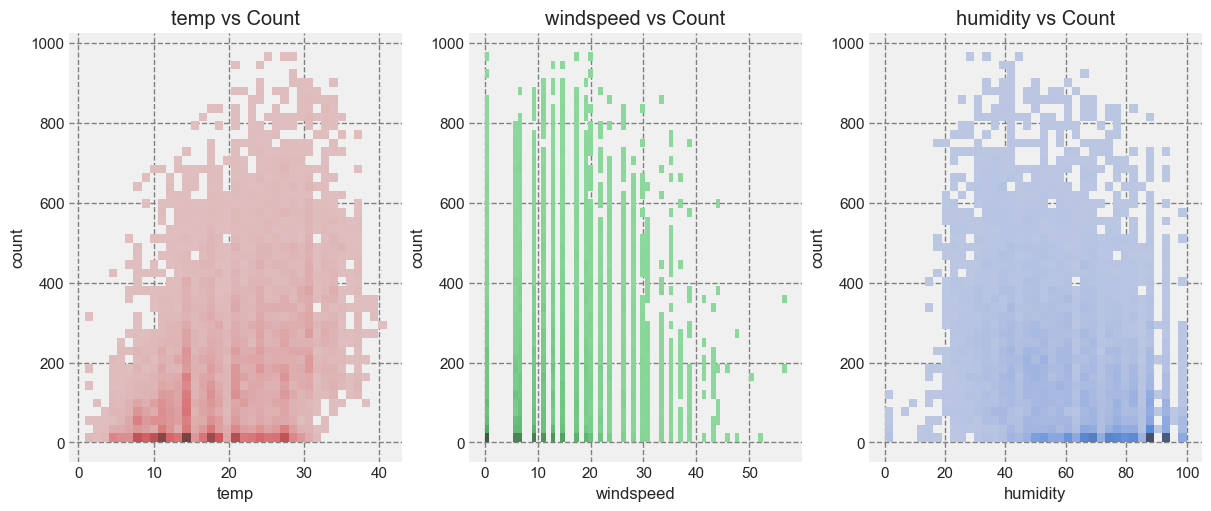

In [22]:
plot_num_feat(df, columns=["temp", "windspeed", "humidity"])

In [23]:

def extract_day_time_fe(df: pd.DataFrame, datetime: str) -> pd.DataFrame:
    
    df["datetime"] = pd.to_datetime(df["datetime"])
  
    df[f"{datetime}_year"] = df[datetime].dt.year
    df[f"{datetime}_hour"] = df[datetime].dt.hour
    df[f"{datetime}_month"] = df[datetime].dt.month
    df[f"{datetime}_month_name"] = df[datetime].dt.month_name()
    df[f"{datetime}_day"] = df[datetime].dt.day
    df[f"{datetime}_day_name"] = df[datetime].dt.day_name()
    df.set_index(["datetime"], inplace = True)
 
    return df

In [24]:
df = extract_day_time_fe(df, "datetime")

In [25]:
def plot_rolling_median(df: pd.DataFrame, window_size=1000, column='count',   save_path="rolling.png",legend_loc='upper left', legend_fancybox=True, alpha=0.9):
    
    df.rolling(window_size)[column].median().plot(y=column)
     # Customizing the legend
    legend = plt.legend(frameon=True, loc=legend_loc, fancybox=legend_fancybox, edgecolor='gray')
    legend.get_frame().set_alpha(alpha)  # Set transparency for the legend frame

    # Clean up the plot by removing the top and right spines
    sns.despine()

    # Optionally, set a title, labels, or adjust other plot settings
    plt.title(f'Rolling Median ({window_size}-window) of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()
    plt.close()


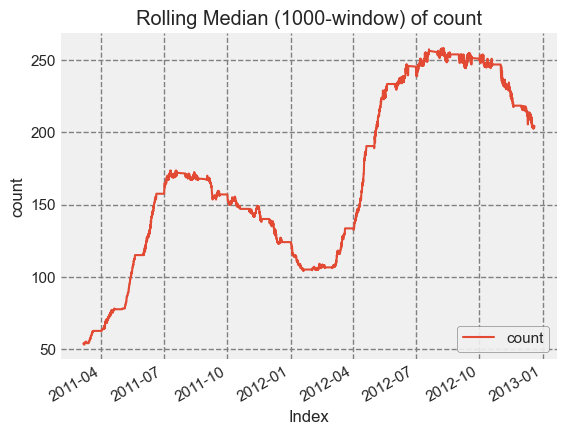

In [26]:
plot_rolling_median(df, window_size=1000, column='count', legend_loc='lower right')

In [27]:
def plotting(df: pd.DataFrame, column='datetime_year', save_path="total_yearly.png",legend_loc='upper left', legend_fancybox=True, alpha=0.9):


    years = df[column].unique()
    for year in years:
        # Filter the DataFrame for the specific year
        df_year = df[df[column] == year]
        
  
        # Group by month, count the occurrences, and unstack
        df_plot = df_year.groupby('datetime_month')['count'].size()

        # Plot the data
        df_plot.plot(kind='line', marker='o', title=f"Year: {year}")
        plt.xlabel("Month")
        plt.ylabel("Total Count")

        legend = plt.legend(frameon=True, loc="upper left", fancybox=True, edgecolor='gray')
        legend.get_frame().set_alpha(0.9)
        sns.despine()
        plt.savefig(save_path, dpi=600, bbox_inches='tight')
        plt.show()
        

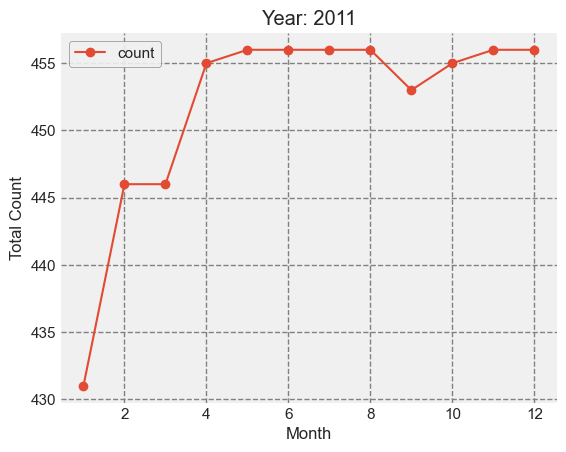

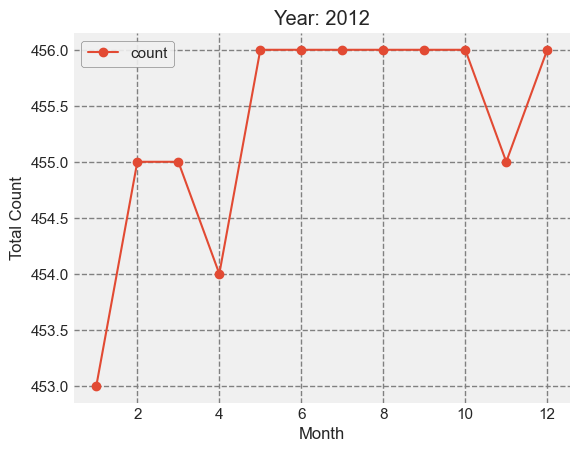

In [28]:
plotting(df,column='datetime_year', legend_loc='lower right')

In [31]:

def plot_yearly_user_activity(df: pd.DataFrame, year_column: str = 'datetime_year', month_column: str = 'datetime_month', 
                              registered_col: str = 'registered', casual_col: str = 'casual', holiday_col: str = 'holiday'):
   
    years = df[year_column].unique()  # Get the unique years in the dataset
    for year in years:
        # Filter the DataFrame for the specific year
        df_year = df[df[year_column] == year]
        
        fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

        # Plot 'registered' with holiday as hue
        sns.lineplot(x=month_column, y=registered_col, data=df_year, hue=holiday_col, ax=axes[0], marker='o', label="Registered", errorbar=None)
        axes[0].set_title(f"Year: {year} - Registered Users")
        axes[0].set_ylabel("Registered Count")
        axes[0].legend(frameon=True, title="Holiday", loc="upper left", labels=["No Holiday", "Holiday"], fancybox=True, edgecolor='gray')
        
        # Plot 'casual' with holiday as hue
        sns.lineplot(x=month_column, y=casual_col, data=df_year, hue=holiday_col, ax=axes[1], linestyle='--', label="Casual", errorbar=None)
        axes[1].set_title(f"Year: {year} - Casual Users")
        axes[1].set_xlabel("Month", fontsize=12)
        axes[1].set_ylabel("Casual Count")
        axes[1].legend(frameon=True, title="Holiday", loc="upper left", labels=["No Holiday", "Holiday"], fancybox=True, edgecolor='gray')

        # Remove the top and right spines for a cleaner look
        sns.despine()

        # Show the plot
        plt.tight_layout()
        plt.show()


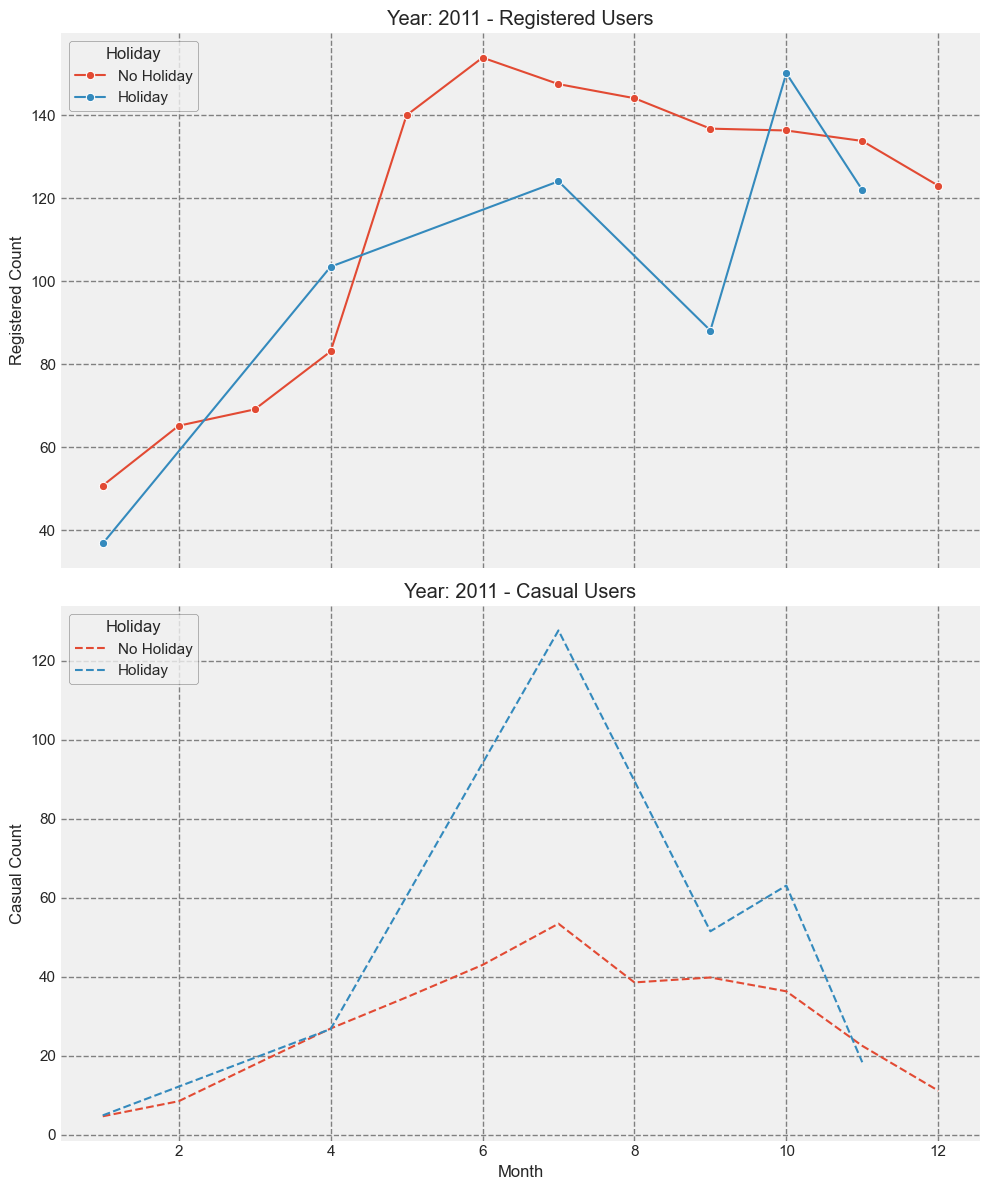

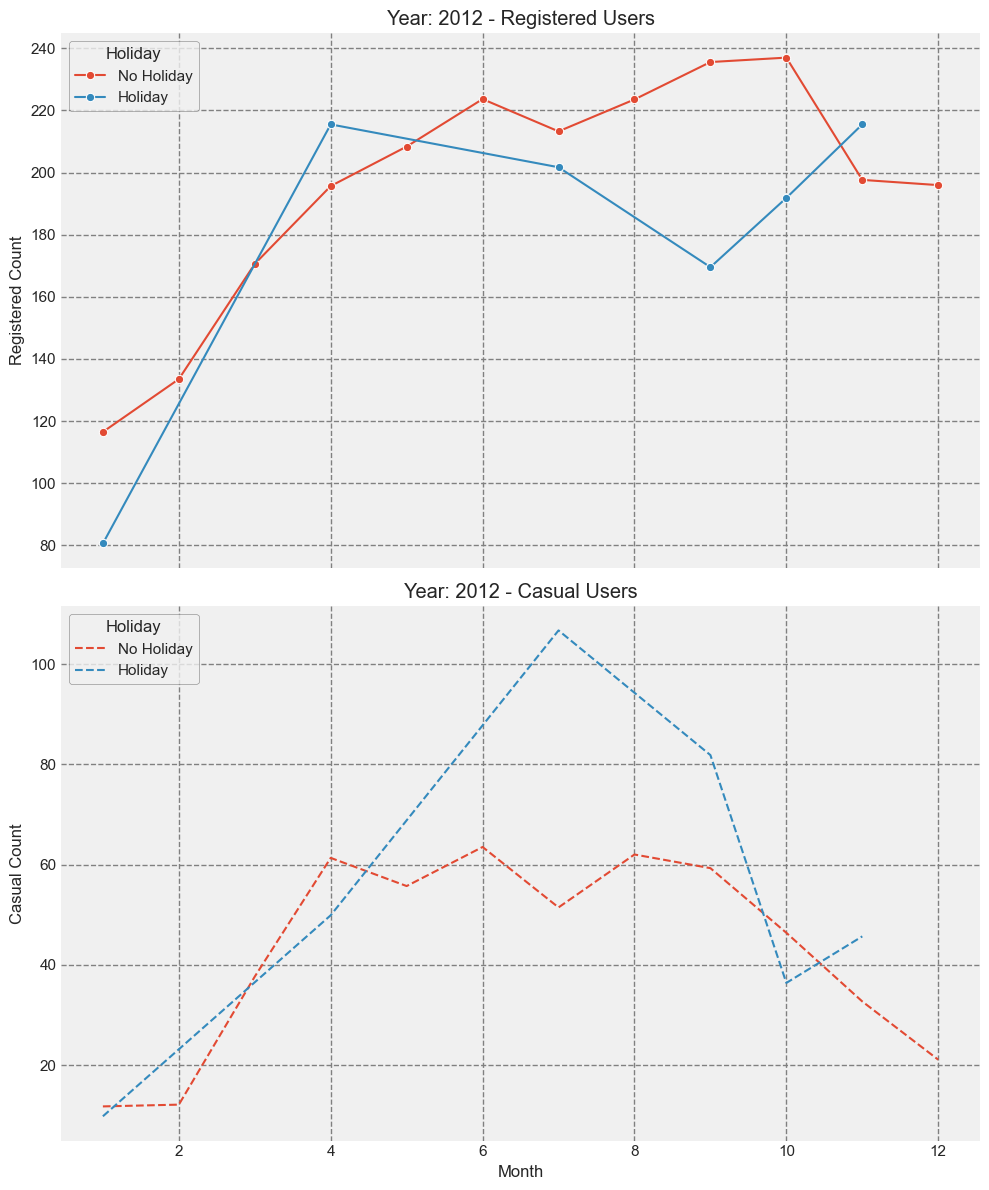

In [32]:

plot_yearly_user_activity(df, year_column ='datetime_year', month_column ='datetime_month', 
                              registered_col = 'registered', casual_col = 'casual', holiday_col = 'holiday')

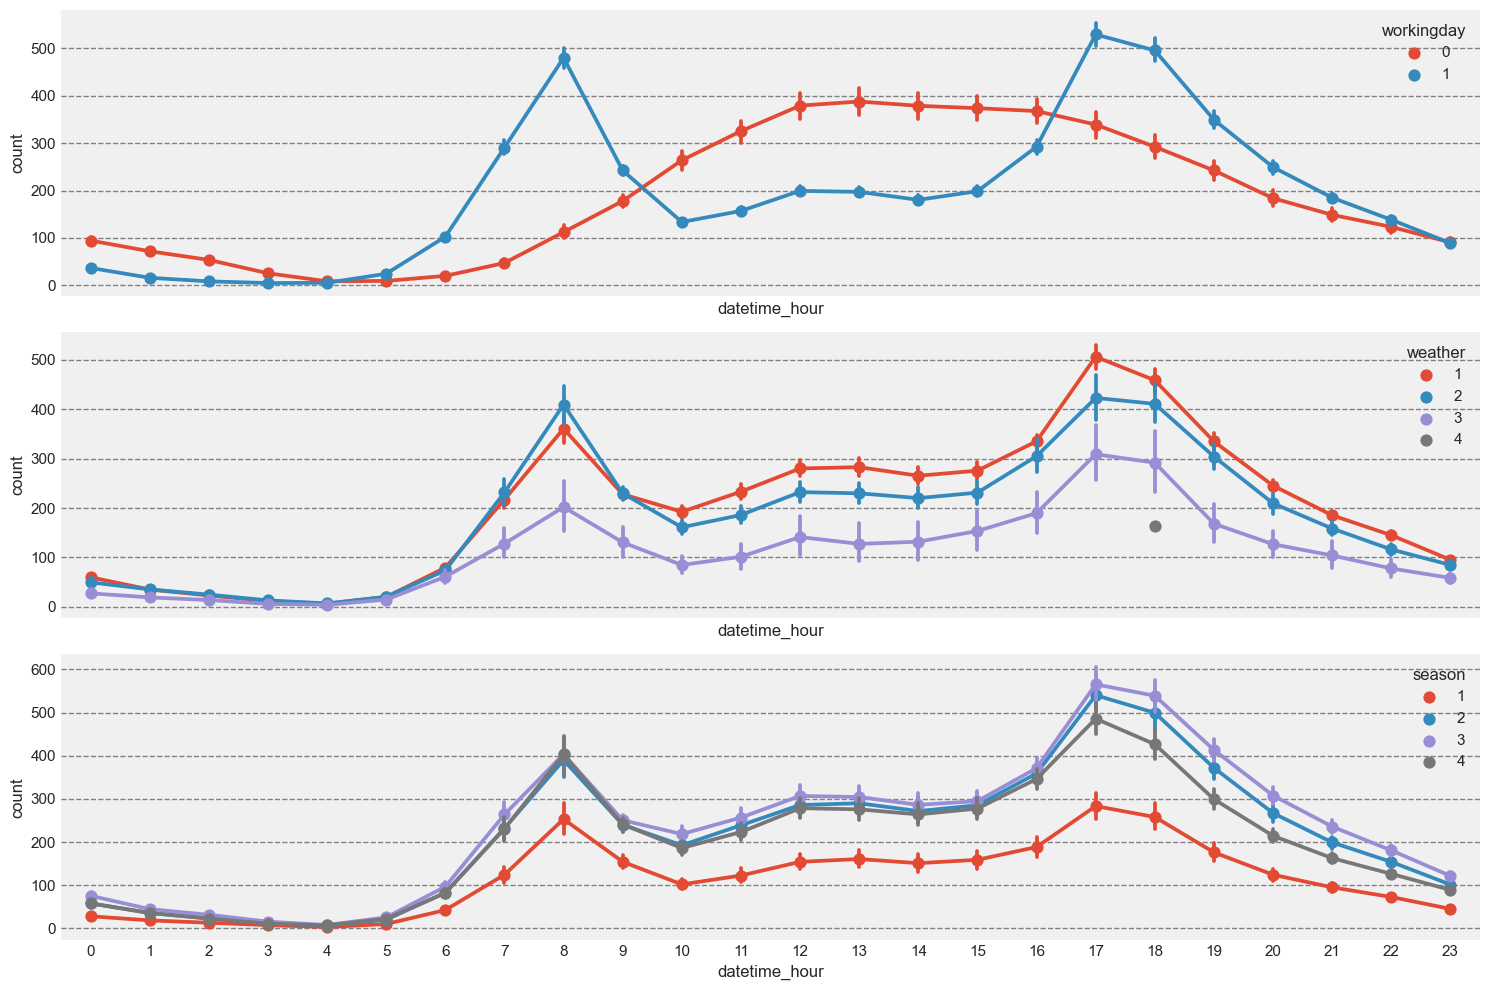

In [49]:

# List of hues to loop over
hues = ['workingday', 'weather', 'season']

# Create subplots: One for each hue, arranged in a single column with multiple rows
fig, axes = plt.subplots(len(hues), 1, figsize=(15, 10), sharex=True)

# Loop through each hue and plot on the corresponding axis
for i, hue in enumerate(hues):
    sns.pointplot(x='datetime_hour', y='count', data=df, hue=hue, ax=axes[i])

# Remove top and right spines for a cleaner look
sns.despine()

# Adjust layout to make sure plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()


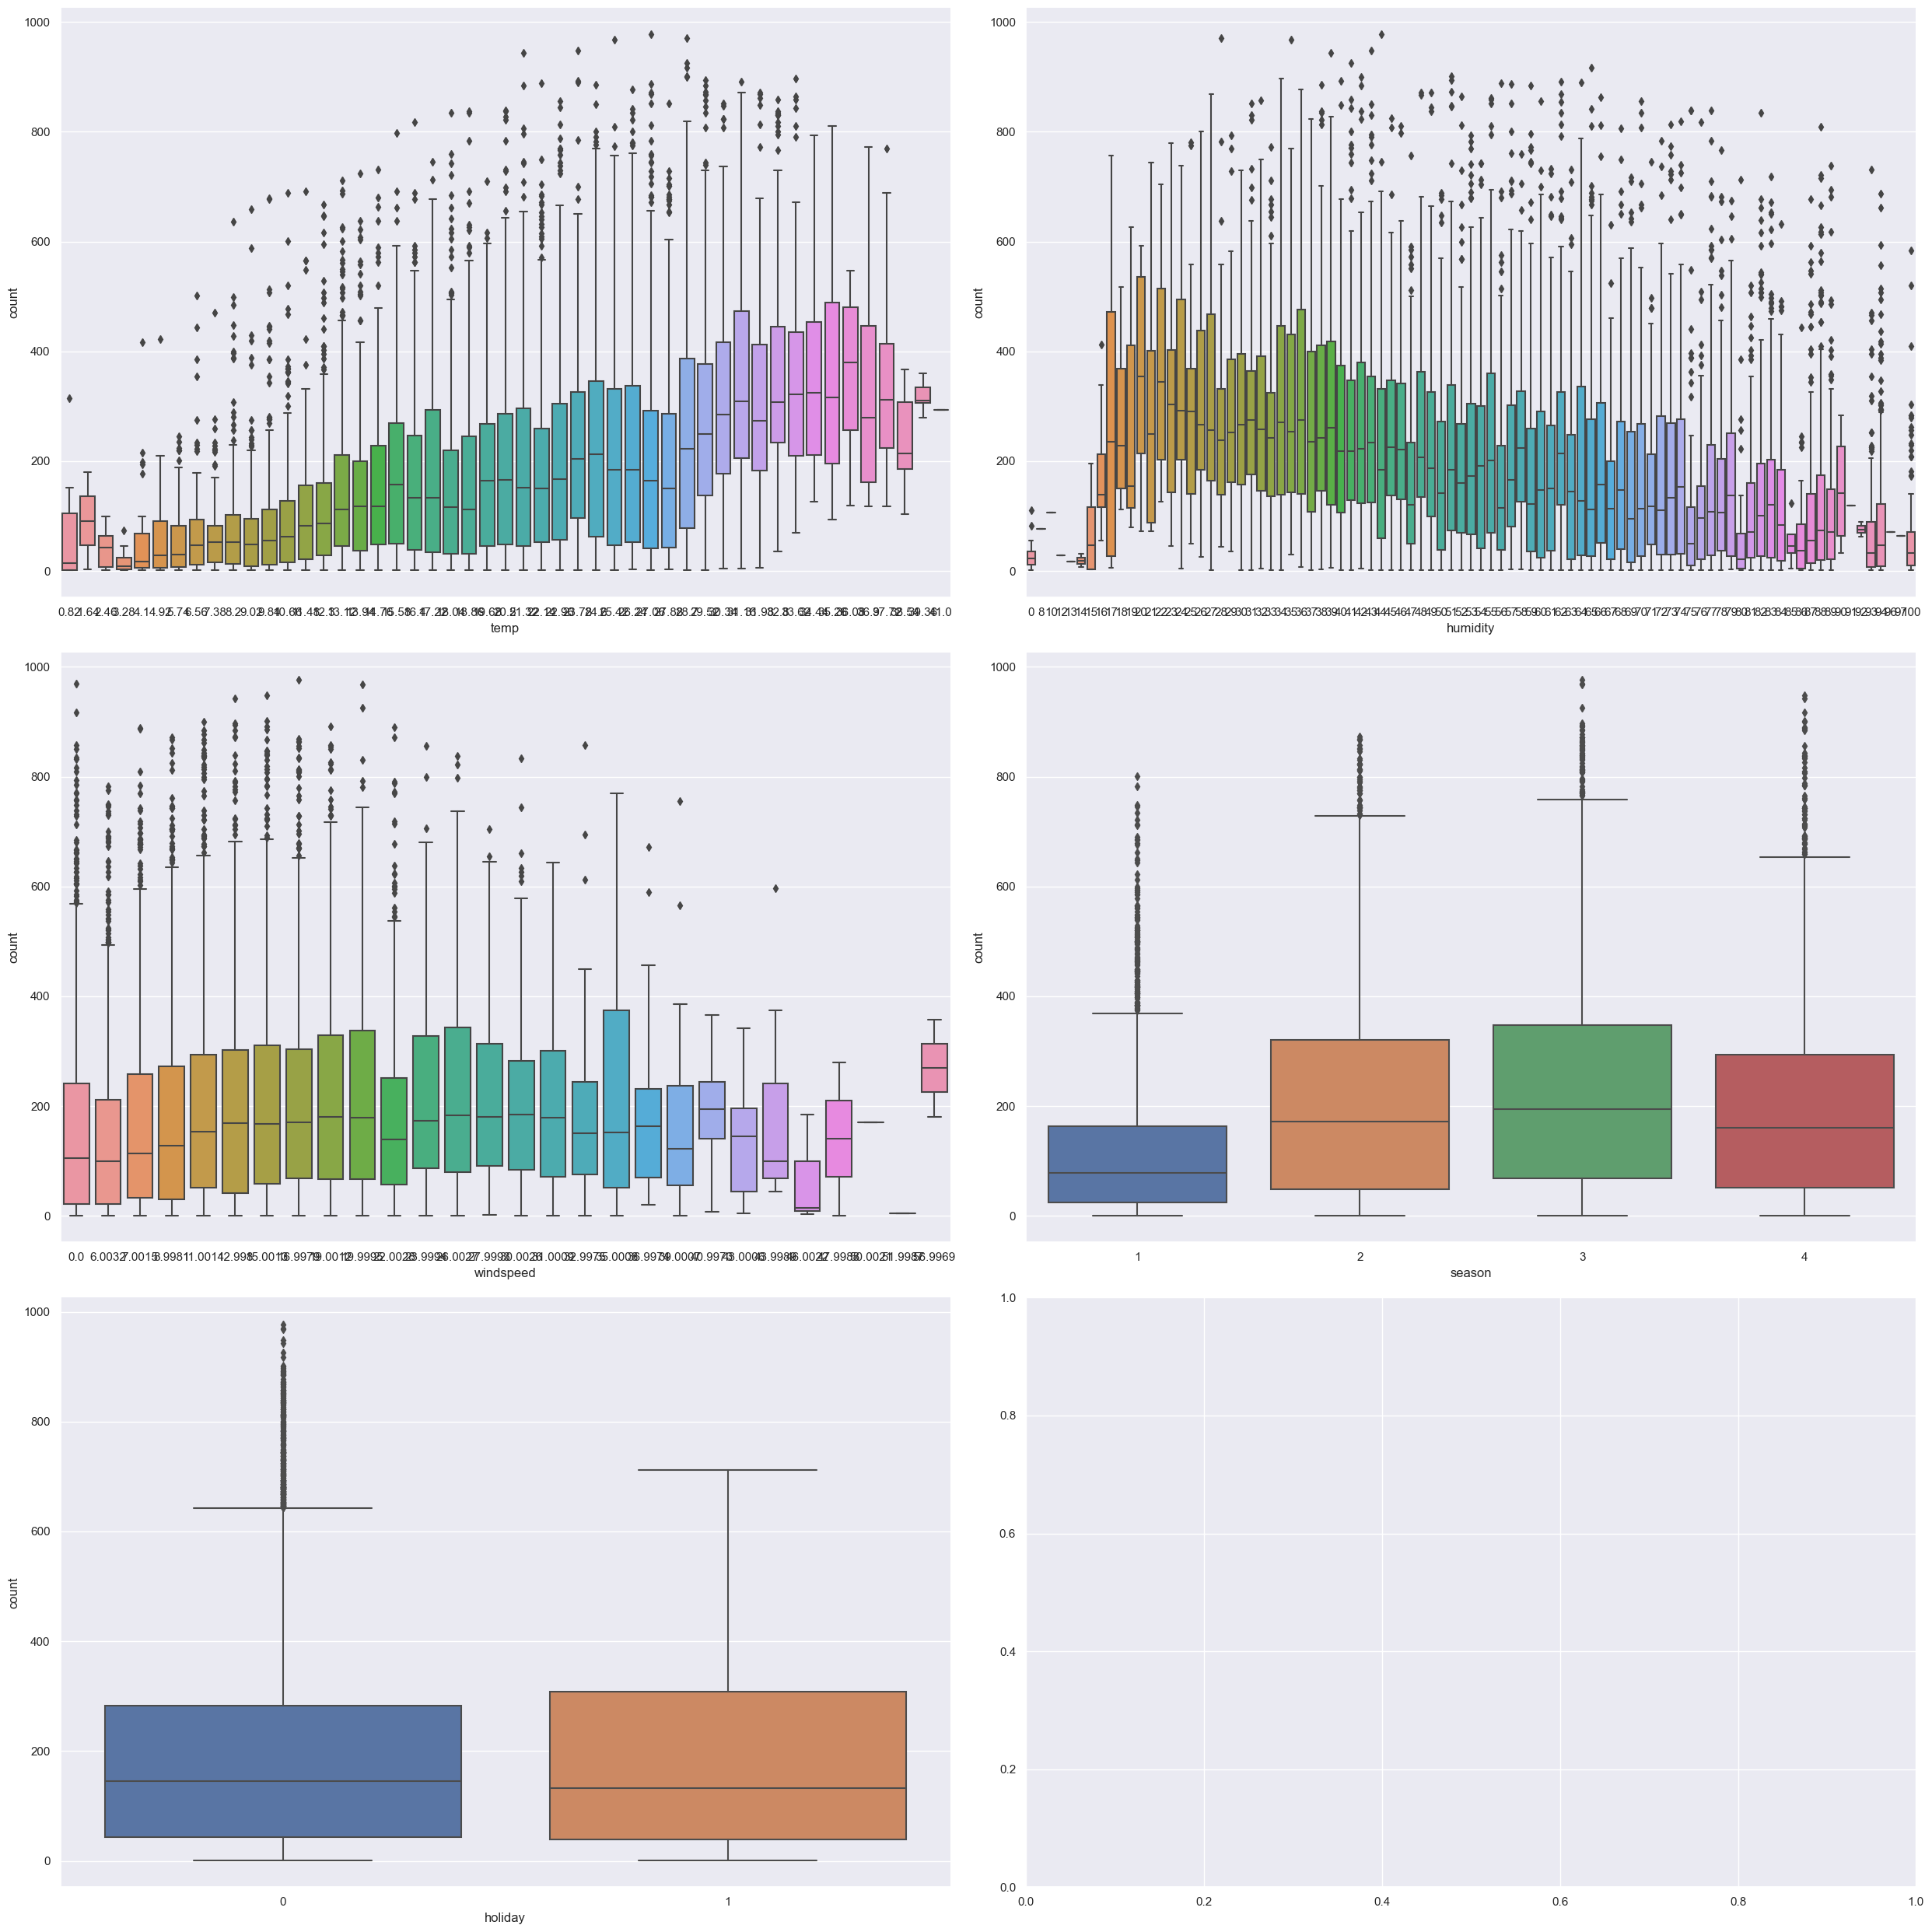

In [58]:
# Set the font scale for better readability
sns.set(font_scale=1.0)

# List of columns to plot on the x-axis
columns = ['temp', 'humidity', 'windspeed', 'season', 'holiday']

# Create subplots: 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and plot each boxplot
for i, col in enumerate(columns):
    sns.boxplot(data=df, y="count", x=col, orient="v", ax=axes[i])

# Remove top and right spines for a cleaner look
sns.despine()

# Adjust the layout to ensure that the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df.groupby(['datetime_hour','workingday']).total.mean().unstack().plot()
sns.despine()

In [ ]:
plt.figure(figsize = (16,8))

sns.lineplot(x = 'datetime_hour', y= 'total',hue ='datetime_day_name' , data = df)
sns.despine()